<a href="https://colab.research.google.com/github/am-robin17/Machine-Learning-Lab/blob/main/Image_Classification_on_Intel_Image_Classification_Dataset_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🧠 Image Classification**

Image Classification is a fundamental task in machine learning based image processing where the goal is to assign a label (or class) to an input image from a fixed set of categories. It involves analyzing the image’s content—such as patterns, colors, shapes, and textures—to determine what it represents. For this purpose, a model here is trained on nature scenes might classify an image as a "forest", "mountain", or "sea".



**🔁 Transfer Learning**


Transfer Learning is a technique in deep learning where a model trained on one large dataset (like ImageNet) is reused on a new, often smaller, task. Instead of training a model from scratch, we use a pretrained model (such as MobileNetV2 or ResNet) and either:

* Freeze its base layers and train only the top layers for our task, or

* Fine-tune some of the pretrained layers to adapt better.


This approach is faster, requires less data, and usually results in higher accuracy, especially when the new dataset is limited.

# Initialization

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Step 2: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


In [3]:
# Step 3: Define Dataset Path
data_dir = '/content/drive/MyDrive/Machine Learning Lab - Data Visualization/Machine Learning Project/Intel Image Classification/Dataset'


In [4]:
# Step 4: Define Preprocessing and Split (80% train, 20% val)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)


Found 11235 images belonging to 6 classes.
Found 2805 images belonging to 6 classes.


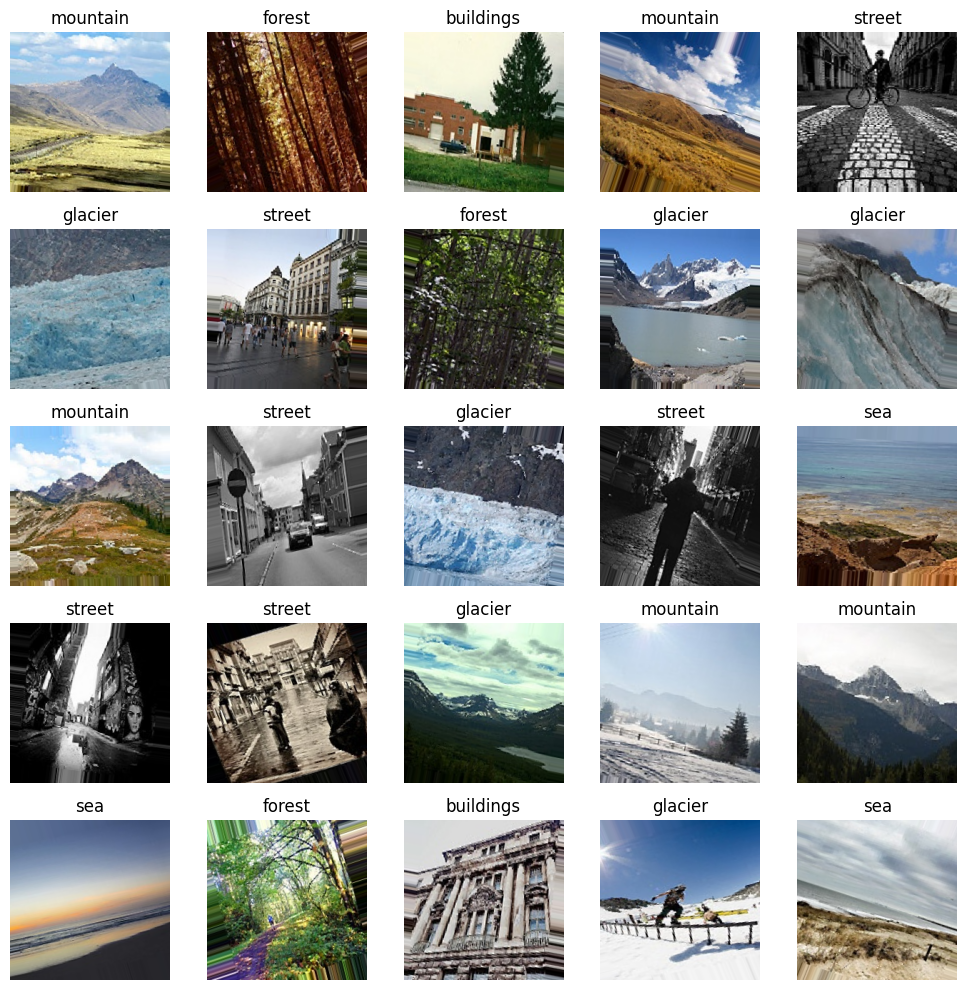

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the generator
image_batch, label_batch = next(iter(train_data))

# Number of images to show
num_images_to_display = 25

# Get class names from the generator
class_names = list(train_data.class_indices.keys())

# Create subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i in range(num_images_to_display):
    ax = axes[i // 5, i % 5]
    ax.imshow(image_batch[i])

    # Get class index and name
    class_index = np.argmax(label_batch[i])
    class_name = class_names[class_index]

    ax.set_title(f"{class_name}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [5]:
# Step 5: Load Pretrained MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Step 6: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
# Step 7: Train the Model
EPOCHS = 5  # You can increase this to 10–20 for better accuracy

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3207s 9s/step - accuracy: 0.7821 - loss: 0.5845 - val_accuracy: 0.8881 - val_loss: 0.2972
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 993s 3s/step - accuracy: 0.8849 - loss: 0.3191 - val_accuracy: 0.8938 - val_loss: 0.2852
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 951s 3s/step - accuracy: 0.8833 - loss: 0.3067 - val_accuracy: 0.8998 - val_loss: 0.2678
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 955s 3s/step - accuracy: 0.8974 - loss: 0.2798 - val_accuracy: 0.8870 - val_loss: 0.3196
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 942s 3s/step - accuracy: 0.8919 - loss: 0.2785 - val_accuracy: 0.8955 - val_loss: 0.2868


In [12]:
# Step 8: Evaluate the Model
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Predict class probabilities
val_data.reset()  # Ensure correct ordering
pred_probs = model.predict(val_data, verbose=1)

# Step 2: Get predicted class indices
pred_classes = np.argmax(pred_probs, axis=1)

# Step 3: Get true labels
true_classes = val_data.classes  # Already in index form
class_labels = list(val_data.class_indices.keys())  # e.g., ['buildings', 'forest', ...]

# Step 4: Print Classification Report
report = classification_report(true_classes, pred_classes, target_names=class_labels)
print("📊 Classification Report:\n")
print(report)


val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


88/88 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step
📊 Classification Report:

              precision    recall  f1-score   support

   buildings       0.92      0.92      0.92       438
      forest       0.99      0.98      0.99       454
     glacier       0.86      0.79      0.82       480
    mountain       0.85      0.84      0.85       503
         sea       0.88      0.97      0.92       454
      street       0.92      0.93      0.93       476

    accuracy                           0.90      2805
   macro avg       0.90      0.91      0.90      2805
weighted avg       0.90      0.90      0.90      2805

88/88 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.8970 - loss: 0.2655
Validation Accuracy: 89.52%


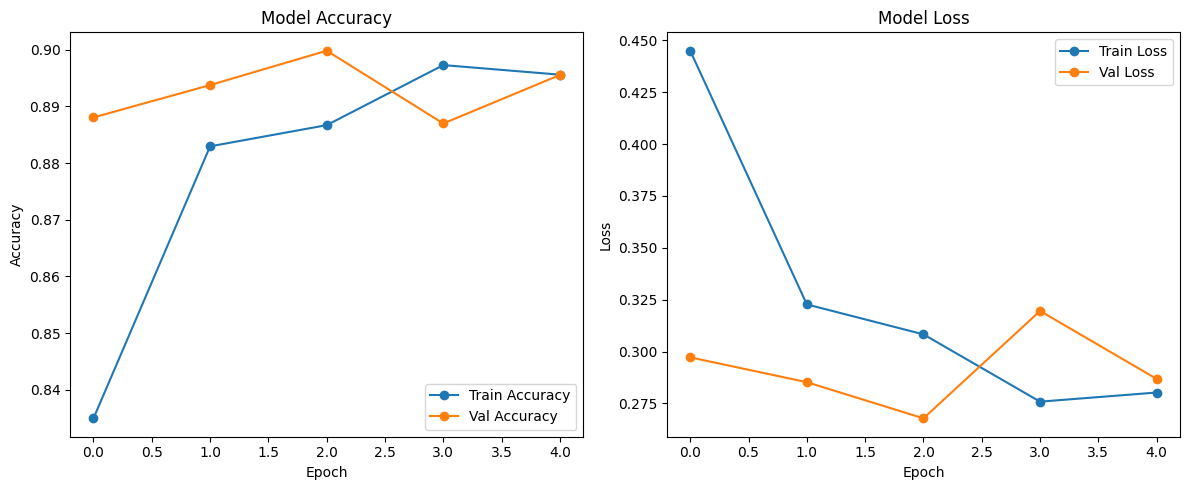

In [13]:
# Step 9: Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
